# Import Data and Required Packages

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
 # To show the plots in note book only
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# Read the CSV File and Explore the Data

In [116]:
df= pd.read_csv('data/Loan Prediction Dataset.csv')

## Drop ID features

In [117]:
# input
cols = ['Loan_ID']
df = df.drop(columns = cols,axis=1)

## Show Top 5 Records

In [118]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## No.of rows and No.of Columns in dataset

In [119]:
shape = df.shape
rows = shape[0]
columns = shape[1]
print(f"No.of Rows {rows}")
print(f"No.of Columns {columns}")

No.of Rows 614
No.of Columns 12


## Columns Information

In [120]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [121]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [122]:
df.dtypes.value_counts()

object     7
float64    4
int64      1
Name: count, dtype: int64

In [123]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [124]:
df.select_dtypes(include=[np.number]).head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


### List of Numeric Columns


In [125]:
df.select_dtypes(include=np.number).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### Numerical Values statistics


In [126]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### List of Object Columns

In [128]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [129]:
#object_df = df.select_dtypes(include=object).columns

for object in categorical_features:
    object_values = df[object].unique()
    print(f"Categories in {object} variable are {object_values}")

Categories in Gender variable are ['Male' 'Female' nan]
Categories in Married variable are ['No' 'Yes' nan]
Categories in Dependents variable are ['0' '1' '2' '3+' nan]
Categories in Education variable are ['Graduate' 'Not Graduate']
Categories in Self_Employed variable are ['No' 'Yes' nan]
Categories in Property_Area variable are ['Urban' 'Rural' 'Semiurban']
Categories in Loan_Status variable are ['Y' 'N']


### List of Bool Columns

In [130]:
df.select_dtypes(include=bool ).columns

Index([], dtype='object')

### List of DateTime Columns

In [131]:
df.select_dtypes(include=np.datetime64 ).columns

Index([], dtype='object')

## Missing Values

In [132]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Handling the Missing Values


Delete the column if there more percentage of missing values provided in the threshold(90)

In [133]:
# {input}threshold_input = input("Enter the Number")
inputPercentageOfMissingValuesThreshold = 90
for column in df.columns:
    if (df[column].isna().sum()/rows > inputPercentageOfMissingValuesThreshold):
        df =  df.drop(column, axis=1)
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [134]:
numericDataFrame = df[numeric_features]
numericDataFrame

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [135]:
#input
inputMissingValueEstimatorForNumericValues = 'mean'
# Define the missing value estimator
meanImputer = SimpleImputer(missing_values = np.nan,strategy=inputMissingValueEstimatorForNumericValues)
numericDataFrame_imputed = meanImputer.fit_transform(numericDataFrame)
numericDataFrame_imputed = pd.DataFrame(numericDataFrame_imputed,columns = numericDataFrame.columns)

In [136]:
categoricalDataFrame = df[categorical_features]
categoricalDataFrame

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [137]:
#input
inputMissingValueEstimatorForCategoricalValues = 'most_frequent'
# Define the missing value estimator
modeImputer = SimpleImputer(missing_values = np.nan,strategy=inputMissingValueEstimatorForCategoricalValues)
categoricalDataFrame_imputed = modeImputer.fit_transform(categoricalDataFrame)
categoricalDataFrame_imputed= pd.DataFrame(categoricalDataFrame_imputed,columns = categoricalDataFrame.columns)

In [140]:
type(categoricalDataFrame)
df =pd.concat([categoricalDataFrame_imputed,numericDataFrame_imputed],join="inner", axis=1)



## Duplicate Check

In [141]:
df.duplicated().sum()

0

# Visualization

## CountPlot

<Axes: >

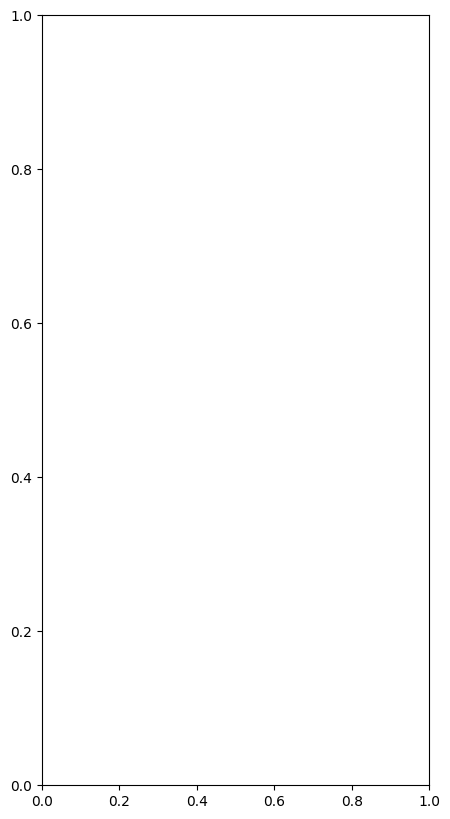

In [154]:
fig, axs = plt.subplots(numeric_features.__len__(), figsize=(5, 10))
plt.subplot(111)

In [ ]:
numeric_features.

5